In [16]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [17]:
#test mono sto testing tis postgres

test_df = pd.read_csv('../data/test1.csv')
test_df.rename(columns={'predict_label': 'label'}, inplace=True)
train_df = pd.read_csv('../data/df_final_for_Reg.csv')
train_df = train_df.iloc[148:,:]



test_df['text_embedding'] = test_df['text_embedding'].apply(lambda x: x.replace('[',"").replace("]",""))
train_df['text_embedding'] = train_df['text_embedding'].apply(lambda x: x.replace('[',"").replace("]",""))


test_df['text_embedding'] = test_df['text_embedding'].apply(lambda x: [float(x) for x in x.split(',')])
train_df['text_embedding'] = train_df['text_embedding'].apply(lambda x: [float(x) for x in x.split(',')])

# train_df['text_embedding'] = train_df['text_embedding'].apply(lambda x: np.array(x, dtype=np.float64))
# test_df['text_embedding'] = test_df['text_embedding'].apply(lambda x: np.array(x, dtype=np.float64))

In [18]:
arr = [test_df.iloc[i,2] for i in range(len(test_df))]

In [19]:
X_train, X_test, y_train, y_test= train_test_split(arr  , np.array(test_df.iloc[:,3]).astype('int'), test_size=0.2, random_state=42)


In [20]:
X_train, y_train = [train_df.iloc[i,2] for i in range(len(train_df))],  np.array(train_df.label)

Model Accuracy: 0.367

Model Recall: 0.367

Model Precision: 0.424

Model F1-Score: 0.372

Cross validation score: [0.318 0.362 0.376 0.479 0.765 0.779 0.676 0.662 0.742 0.648]

Classification report:
               precision    recall  f1-score   support

           0       0.50      0.27      0.35        15
           1       0.40      0.50      0.44        12
           2       0.14      0.33      0.20         3

    accuracy                           0.37        30
   macro avg       0.35      0.37      0.33        30
weighted avg       0.42      0.37      0.37        30




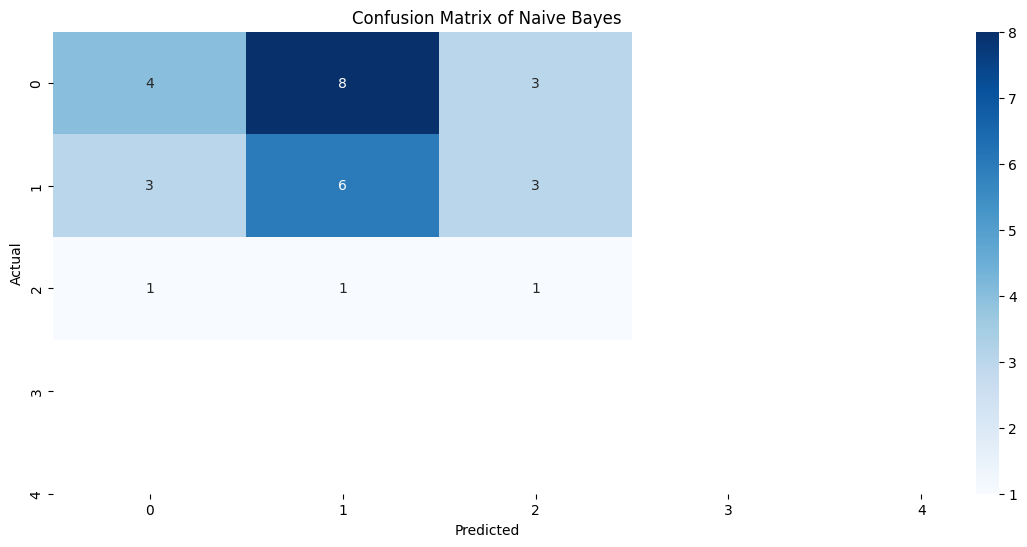

In [21]:

#Naive bayes 


nb = GaussianNB()
nb.fit(X_train,y_train)
y_pred = nb.predict(np.array(X_test))

# #model evaluation
confusion_matrix = metrics.confusion_matrix(np.array(y_test), y_pred )
classification = metrics.classification_report(np.array(y_test), y_pred )
scores = cross_val_score(nb, X_train,np.array(y_train), cv=10)

precision = metrics.precision_score(y_test, y_pred, average='weighted')
recall = metrics.recall_score(y_test, y_pred, average='weighted')
accuracy = metrics.accuracy_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred, average='weighted')

#print results and plot confusion matrix
print ("Model Accuracy:", np.round(accuracy,3))
print()
print ("Model Recall:", np.round(recall,3))
print()
print ("Model Precision:", np.round(precision,3))
print()
print ("Model F1-Score:", np.round(f1,3))
print()



print ("Cross validation score:", np.round(scores,3))
print()
print("Classification report:" "\n", classification) 
print()

plt.figure(figsize=(14, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1,2,3,4], yticklabels=[0,1,2,3,4])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Naive Bayes')
plt.show()

c:\Users\johnk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\johnk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\johnk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

Model Accuracy: 0.467

Model Recall: 0.467

Model Precision: 0.425

Model F1-Score: 0.441

Cross validation score: [0.542 0.559 0.582 0.667 0.845 0.869 0.85  0.836 0.845 0.84 ]

Classification report:
               precision    recall  f1-score   support

           0       0.50      0.47      0.48        15
           1       0.44      0.58      0.50        12
           2       0.00      0.00      0.00         3

    accuracy                           0.47        30
   macro avg       0.31      0.35      0.33        30
weighted avg       0.42      0.47      0.44        30




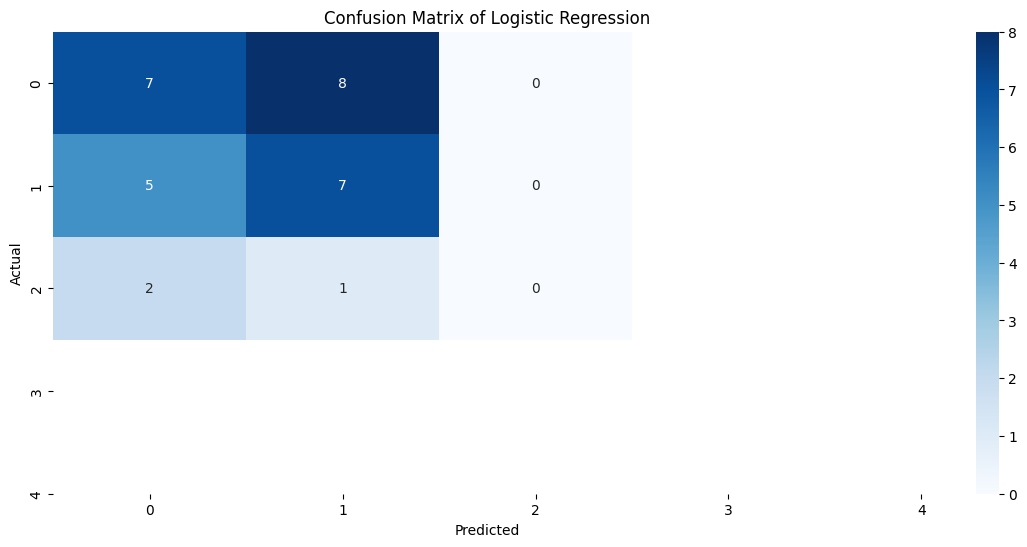

In [28]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression  

lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(np.array(X_test))

#model evaluation
confusion_matrix = metrics.confusion_matrix(np.array(y_test), y_pred )
classification = metrics.classification_report(np.array(y_test), y_pred )
scores = cross_val_score(lr, X_train,np.array(y_train), cv=10)

precision = metrics.precision_score(y_test, y_pred, average='weighted')
recall = metrics.recall_score(y_test, y_pred, average='weighted')
accuracy = metrics.accuracy_score(y_test, y_pred,)
f1 = metrics.f1_score(y_test, y_pred, average='weighted')

#print results and plot confusion matrix
print ("Model Accuracy:", np.round(accuracy,3))
print()
print ("Model Recall:", np.round(recall,3))
print()
print ("Model Precision:", np.round(precision,3))
print()
print ("Model F1-Score:", np.round(f1,3))
print()

print ("Cross validation score:", np.round(scores,3))
print()
print("Classification report:" "\n", classification) 
print()

plt.figure(figsize=(14, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1,2,3,4], yticklabels=[0,1,2,3,4])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Logistic Regression')
plt.show()


c:\Users\johnk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\johnk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\johnk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

Model Accuracy: 0.533

Model Recall: 0.533

Model Precision: 0.496

Model F1-Score: 0.506

Cross validation score: [0.542 0.559 0.582 0.667 0.845 0.869 0.85  0.836 0.845 0.84 ]

Classification report:
               precision    recall  f1-score   support

           0       0.62      0.53      0.57        15
           1       0.47      0.67      0.55        12
           2       0.00      0.00      0.00         3

    accuracy                           0.53        30
   macro avg       0.36      0.40      0.37        30
weighted avg       0.50      0.53      0.51        30




c:\Users\johnk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


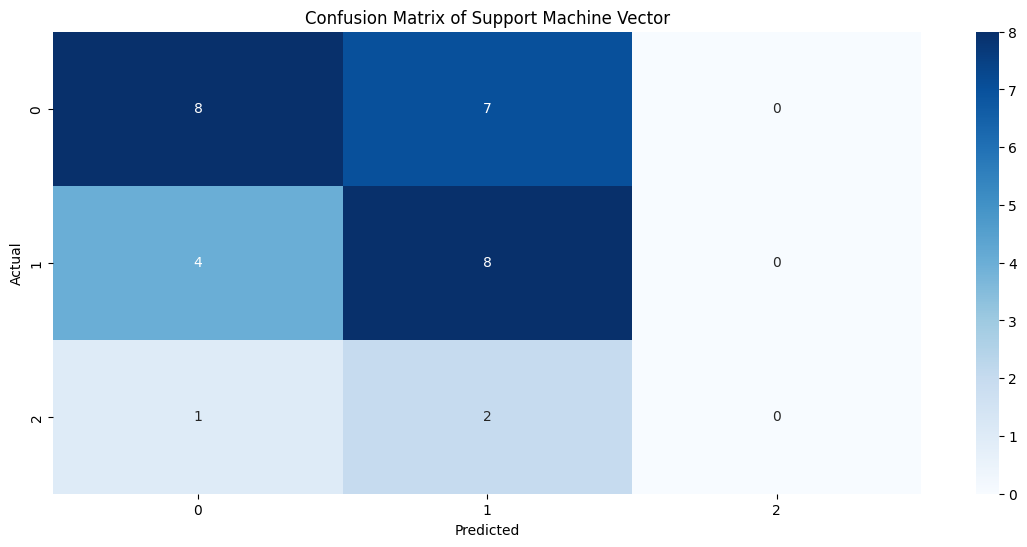

In [23]:
#SVM Model
from sklearn.svm import SVC
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)


#model evaluation
confusion_matrix = metrics.confusion_matrix(np.array(y_test), y_pred )
classification = metrics.classification_report(np.array(y_test), y_pred )
scores = cross_val_score(svm_classifier, X_train,np.array(y_train), cv=10)

precision = metrics.precision_score(y_test, y_pred, average='weighted')
recall = metrics.recall_score(y_test, y_pred, average='weighted')
accuracy = metrics.accuracy_score(y_test, y_pred,)
f1 = metrics.f1_score(y_test, y_pred, average='weighted')

#print results and plot confusion matrix
print ("Model Accuracy:", np.round(accuracy,3))
print()
print ("Model Recall:", np.round(recall,3))
print()
print ("Model Precision:", np.round(precision,3))
print()
print ("Model F1-Score:", np.round(f1,3))
print()

print ("Cross validation score:", np.round(scores,3))
print()
print("Classification report:" "\n", classification) 
print()

plt.figure(figsize=(14, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1,2], yticklabels=[0,1,2])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Support Machine Vector')
plt.show()


c:\Users\johnk\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\johnk\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")
c:\Users\johnk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\johnk\AppData\Local\Prog

Model Accuracy: 0.567

Model Recall: 0.567

Model Precision: 0.52

Model F1-Score: 0.491

Cross validation score: [0.547 0.587 0.568 0.606 0.765 0.845 0.826 0.826 0.836 0.737]

Classification report:
               precision    recall  f1-score   support

           0       0.56      0.93      0.70        15
           1       0.60      0.25      0.35        12
           2       0.00      0.00      0.00         3

    accuracy                           0.57        30
   macro avg       0.39      0.39      0.35        30
weighted avg       0.52      0.57      0.49        30




c:\Users\johnk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


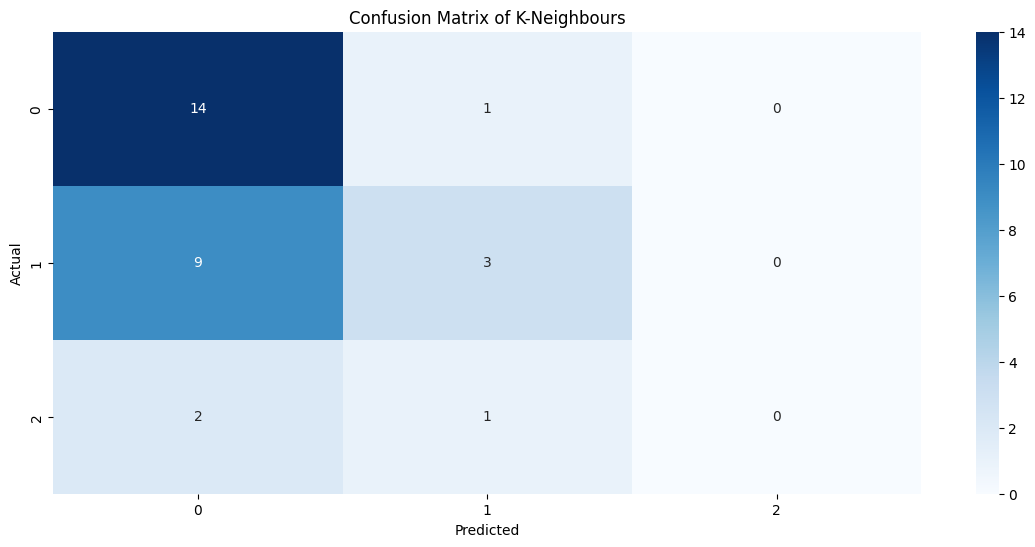

In [24]:
#k-neighbours model
from sklearn.neighbors import KNeighborsClassifier  

kn = KNeighborsClassifier()
kn.fit(X_train,y_train)
y_pred = kn.predict(np.array(X_test))


#model evaluation
confusion_matrix = metrics.confusion_matrix(np.array(y_test), y_pred )
classification = metrics.classification_report(np.array(y_test), y_pred )
scores = cross_val_score(kn, X_train,np.array(y_train), cv=10)

precision = metrics.precision_score(y_test, y_pred, average='weighted')
recall = metrics.recall_score(y_test, y_pred, average='weighted')
accuracy = metrics.accuracy_score(y_test, y_pred,)
f1 = metrics.f1_score(y_test, y_pred, average='weighted')

#print results and plot confusion matrix
print ("Model Accuracy:", np.round(accuracy,3))
print()
print ("Model Recall:", np.round(recall,3))
print()
print ("Model Precision:", np.round(precision,3))
print()
print ("Model F1-Score:", np.round(f1,3))
print()

print ("Cross validation score:", np.round(scores,3))
print()
print("Classification report:" "\n", classification) 
print()

plt.figure(figsize=(14, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1,2], yticklabels=[0,1,2])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of K-Neighbours')
plt.show()


c:\Users\johnk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\johnk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\johnk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

Model Accuracy: 0.433

Model Recall: 0.433

Model Precision: 0.47

Model F1-Score: 0.429

Cross validation score: [0.416 0.469 0.423 0.469 0.531 0.629 0.615 0.62  0.563 0.592]

Classification report:
               precision    recall  f1-score   support

         0.0       0.47      0.60      0.53        15
         1.0       0.33      0.25      0.29        12
         2.0       1.00      0.33      0.50         3
         3.0       0.00      0.00      0.00         0

    accuracy                           0.43        30
   macro avg       0.45      0.30      0.33        30
weighted avg       0.47      0.43      0.43        30




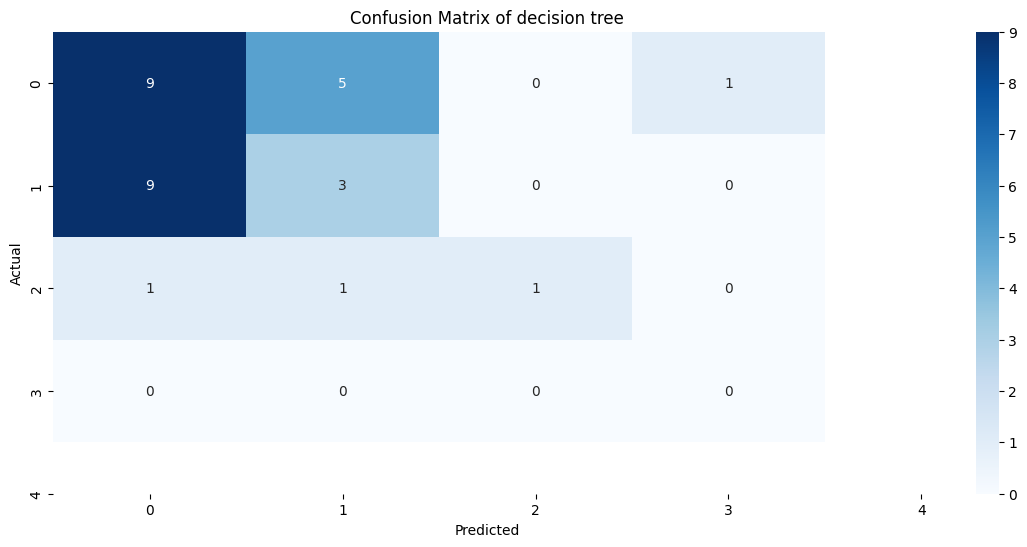

In [25]:
#decision tree
from sklearn.tree import DecisionTreeClassifier 

dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred = dt.predict(np.array(X_test))


#model evaluation
confusion_matrix = metrics.confusion_matrix(np.array(y_test), y_pred )
classification = metrics.classification_report(np.array(y_test), y_pred )
scores = cross_val_score(dt, X_train,np.array(y_train), cv=10)

precision = metrics.precision_score(y_test, y_pred, average='weighted')
recall = metrics.recall_score(y_test, y_pred, average='weighted')
accuracy = metrics.accuracy_score(y_test, y_pred,)
f1 = metrics.f1_score(y_test, y_pred, average='weighted')

#print results and plot confusion matrix
print ("Model Accuracy:", np.round(accuracy,3))
print()
print ("Model Recall:", np.round(recall,3))
print()
print ("Model Precision:", np.round(precision,3))
print()
print ("Model F1-Score:", np.round(f1,3))
print()
print ("Cross validation score:", np.round(scores,3))
print()
print("Classification report:" "\n", classification) 
print()

plt.figure(figsize=(14, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1,2,3,4], yticklabels=[0,1,2,3,4])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of decision tree')
plt.show()


c:\Users\johnk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\johnk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\johnk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

Model Accuracy: 0.467

Model Recall: 0.467

Model Precision: 0.417

Model F1-Score: 0.439

Cross validation score: [0.547 0.549 0.568 0.634 0.812 0.822 0.817 0.817 0.826 0.826]

Classification report:
               precision    recall  f1-score   support

           0       0.50      0.60      0.55        15
           1       0.42      0.42      0.42        12
           2       0.00      0.00      0.00         3

    accuracy                           0.47        30
   macro avg       0.31      0.34      0.32        30
weighted avg       0.42      0.47      0.44        30




c:\Users\johnk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


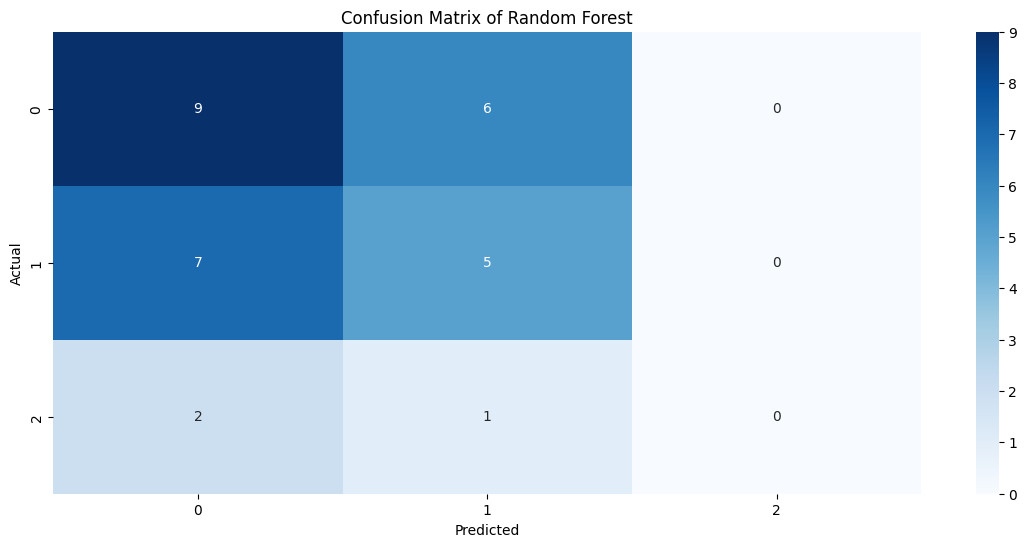

In [26]:
#random forest
from sklearn.ensemble import RandomForestClassifier

rf  = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(np.array(X_test))


#model evaluation
confusion_matrix = metrics.confusion_matrix(np.array(y_test), y_pred )
classification = metrics.classification_report(np.array(y_test), y_pred )
scores = cross_val_score(rf, X_train,np.array(y_train), cv=10)

precision = metrics.precision_score(y_test, y_pred, average='weighted')
recall = metrics.recall_score(y_test, y_pred, average='weighted')
accuracy = metrics.accuracy_score(y_test, y_pred,)
f1 = metrics.f1_score(y_test, y_pred, average='weighted')

#print results and plot confusion matrix
print ("Model Accuracy:", np.round(accuracy,3))
print()
print ("Model Recall:", np.round(recall,3))
print()
print ("Model Precision:", np.round(precision,3))
print()
print ("Model F1-Score:", np.round(f1,3))
print()

print ("Cross validation score:", np.round(scores,3))
print()
print("Classification report:" "\n", classification) 
print()

plt.figure(figsize=(14, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1,2], yticklabels=[0,1,2])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Random Forest')
plt.show()

Model Accuracy: 0.4

Model Recall: 0.4

Model Precision: 0.373

Model F1-Score: 0.386

Cross validation score: [0.519 0.535 0.479 0.592 0.751 0.84  0.779 0.765 0.761 0.784]

Classification report:
               precision    recall  f1-score   support

           0       0.44      0.47      0.45        15
           1       0.38      0.42      0.40        12
           2       0.00      0.00      0.00         3

    accuracy                           0.40        30
   macro avg       0.27      0.29      0.28        30
weighted avg       0.37      0.40      0.39        30




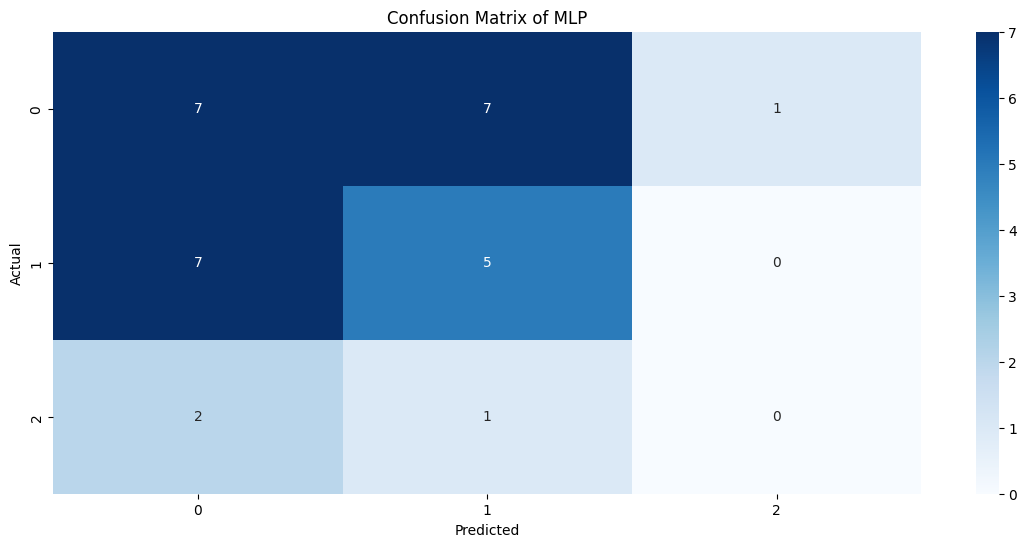

In [27]:
from sklearn.neural_network import MLPClassifier

mlp_classifier = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
mlp_classifier.fit(X_train, y_train)
y_pred = mlp_classifier.predict(X_test)

#model evaluation
confusion_matrix = metrics.confusion_matrix(np.array(y_test), y_pred )
classification = metrics.classification_report(np.array(y_test), y_pred )
scores = cross_val_score(mlp_classifier, X_train,np.array(y_train), cv=10)

precision = metrics.precision_score(y_test, y_pred, average='weighted')
recall = metrics.recall_score(y_test, y_pred, average='weighted')
accuracy = metrics.accuracy_score(y_test, y_pred,)
f1 = metrics.f1_score(y_test, y_pred, average='weighted')

#print results and plot confusion matrix
print ("Model Accuracy:", np.round(accuracy,3))
print()
print ("Model Recall:", np.round(recall,3))
print()
print ("Model Precision:", np.round(precision,3))
print()
print ("Model F1-Score:", np.round(f1,3))
print()

print ("Cross validation score:", np.round(scores,3))
print()
print("Classification report:" "\n", classification) 
print()

plt.figure(figsize=(14, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1,2], yticklabels=[0,1,2])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of MLP')
plt.show()
